In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt

Variable Description:

# Data Preparation

## Report and Description

Date: This column of the dataframe has the date in MM-DD-YYYY
Day: This column of the dataframe has the day of the Week
Quarter: A portion of the month. A month was divided into four quarters
Department: This column of the dataframe depicts the associated department with the instance
Team_no: This column of the dataframe represents the Associated team number with the instance
No_of_workers: This column of the dataframe represents the Number of workers in each team
No_of_style_change: This column of the dataframe describes the Number of changes in the style of a
particular product
Targeted_productivity: This column of the dataframe depicts the Targeted productivity set by the
Authority for each team for each day.
Smv: This column of the dataframe depicts Standard Minute Value, it is the allocated time for a
task.
Wip: This column of the dataframe depicts wip (Work in progress) which includes the number of
unfinished items for products
Over_time: This column of the dataframe represents the amount of overtime by each team in
minutes.
Incentive: This column of the dataframe represents the amount of financial incentive (in BDT)
that enables or motivates a particular course of action.
Idle_time: This column of the dataframe depicted the amount of time when the production was
interrupted due to several reasons
Idle_men: This column of the dataframe depicts the number of workers who were idle due to
production interruption
Actual_productivity: This column of the dataframe depicts the actual % of productivity that the workers delivered. It ranges from 0-to 1

In [2]:
#Data preparation
#First we start with data cleaning and preparation - or at least check what the conditions are of this data set.
#Here we just upload it and create the dataframe to observe and get the first informations out of it
#Next we gonna do a deep dive and check if there is some missing data, if we need to change data types or adjust 
#some data in general to prepare it for EDA

#Here we first conduct somebasic research into the structure and data in our dataframe

df = pd.read_csv("/work/dataset_andre.csv")
print(df.head(5))
print("Tail:")
print(df.tail())
print("Describe:")
print(df.describe())
print("Shape:")
print(df.shape)
print("Info:")
df.info()

       date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0        

In [3]:
#A great way to get a overview over everything that happens in the dataset is ProfileReport
#It creates a general overview over each variable, makes a resume of important insights and already
#shows us the first correlations and missing values. I am going to do a deep-dive nonetheless, to do it myself
#but if you need some fast results, this is also sufficient

report = ProfileReport(df)
report.to_file("report_prod.html")
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


KeyboardInterrupt



## Manual Data preparation and cleaning

In [4]:
#First thing that we can see here is: WIP has many missing values
#There are 2 departments with the same name that need to be combined
#Quarter does not stand for yearly quarter but for monthly quarter --> renaming would make sense
#Then lets move on to do some of the preparation on my own

In [4]:
#Start with the missing value count
df.isnull().sum()
#Question is now whether WIP is somewhat relevant for our prediction model or not - that will be assess later on
#with the regression model, for now on we are leaving it like that and putting the null values to 0
#We could also fill it with the mean value, however since it stands for a specific amount we do not want to falsify or increase the WIP
#number without more information, so we keep it at 0

df['wip'] = df['wip'].fillna(0)
df.isnull().sum()

#Now we at least dont have any null values left

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [6]:
df.value_counts()

date       quarter   department  day       team  targeted_productivity  smv    wip     over_time  incentive  idle_time  idle_men  no_of_style_change  no_of_workers  actual_productivity
1/1/2015   Quarter1  finishing   Thursday  11    0.70                   4.15   0.0     1440       0          0.0        0         0                   12.0           0.436326               1
2/24/2015  Quarter4  sweing      Tuesday   7     0.75                   30.10  739.0   5640       45         0.0        0         1                   59.0           0.750727               1
                                           5     0.80                   30.10  450.0   7140       50         0.0        0         0                   60.0           0.800137               1
                                           4     0.80                   30.10  901.0   6480       50         0.0        0         1                   59.0           0.800072               1
                                           3     0.75  

In [7]:
#No we take a closer look at date values and departments
#First departments:
df["department"].describe()
value_department = df['department'].value_counts()
print(value_department)

#Here we once again see that finishing is split into 2 for no apparent reason - thus we want to fuse them together to make use of the variable
df['department'] = df['department'].apply(lambda x: 'finishing' if x.replace(" ","") == 'finishing' else 'sewing' )
value_department = df['department'].value_counts()
print(value_department)

#Now we have the 2 unique departments and can continue with working on dates, minutes and generall the time variables and see if they fit

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64
sewing       691
finishing    506
Name: department, dtype: int64


In [8]:
#Every time value is currently in minutes - which makes sense in the table itself, but for visualization purpose later on an 
#hour depiction could make it easier to visualize. So we are going to add a hour variable for smv and idle_time

df['smv_hours'] = df['smv']
df['idle_time_hours'] = df['idle_time']
df['over_time_hours'] = df['over_time']
#Check if they got added
df.info()
#They got added, so now lets change the minutes to hours
df['smv_hours'] = df['smv_hours']/60
df['over_time_hours'] = df['over_time_hours']/60
df['idle_time_hours'] = df['idle_time_hours']/60
#Seems like there is nothing much to take out of it, but that can be better assesed in Tableau afterwards
#Next stop are the dates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
 15  smv_

In [9]:
#For dates we have the variable "date", "day" and "quarter"
#Quarter can stay as it is, same goes with day

df['date'] = pd.to_datetime(df['date'])
df["date"]

df['year']= df['date'].dt.year
df['month_name'] = df['date'].dt.month_name()
df['day']= df['date'].dt.day

#We split it into days/month/year - although year is not really useful and months neither but if it would be a bigger dataset it
#would support the visualization process
df["month_name"]

0       January
1       January
2       January
3       January
4       January
         ...   
1192      March
1193      March
1194      March
1195      March
1196      March
Name: month_name, Length: 1197, dtype: object

# EDA

## Basic Graphs

In [10]:
import numpy as np
import plotly_express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

from plotly.offline import plot, iplot,init_notebook_mode

In [7]:
#So far the data preparation seems to be concluded - thus we move on to the EDA process with some data visualization and exploration
plt.figure(figsize = (15,5))
sns.displot(df, x="targeted_productivity")
sns.displot(df, x="actual_productivity")
plt.show()

#There seems to be a bit of a mismatch between targeted and actual productivity



In [8]:
df["date"] = pd.to_datetime(df["date"])


plt.figure(figsize = (15,5))
ax=sns.lineplot(y='targeted_productivity',x='date' ,color = "red", data =df,legend='brief')
ax=sns.lineplot(y= 'actual_productivity',x='date',data=df, color="green", legend = 'brief')
ax.set(ylabel = 'Productivity')
plt.show()

#Targeted seems to be relatively stable with around 0.75, however in actual productivtiy we see a lot more fluctuation


In [9]:
#Plotting overtime and actual productivity to see, whether they affect each other - and you can see some smaller correlations here
#but to be sure we will make a correlation matrix afterwards

plt.figure(figsize = (15,5))
ax=sns.lineplot(data =df, x="date", y="over_time_hours", legend="brief")
ax2 = ax.twinx()
ax=sns.lineplot(data =df,x="date", y="actual_productivity", ax=ax2, legend="brief", color="r")
ax.figure.legend()
plt.show()

ValueError: Could not interpret value `over_time_hours` for parameter `y`

In [14]:
#Distribution of incentive - there is a huge spike in march, lets see if that has something to do with overtime made
sns.lineplot(df, y="incentive", x = "month_name")

TypeError: tz must be string or tzinfo subclass.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


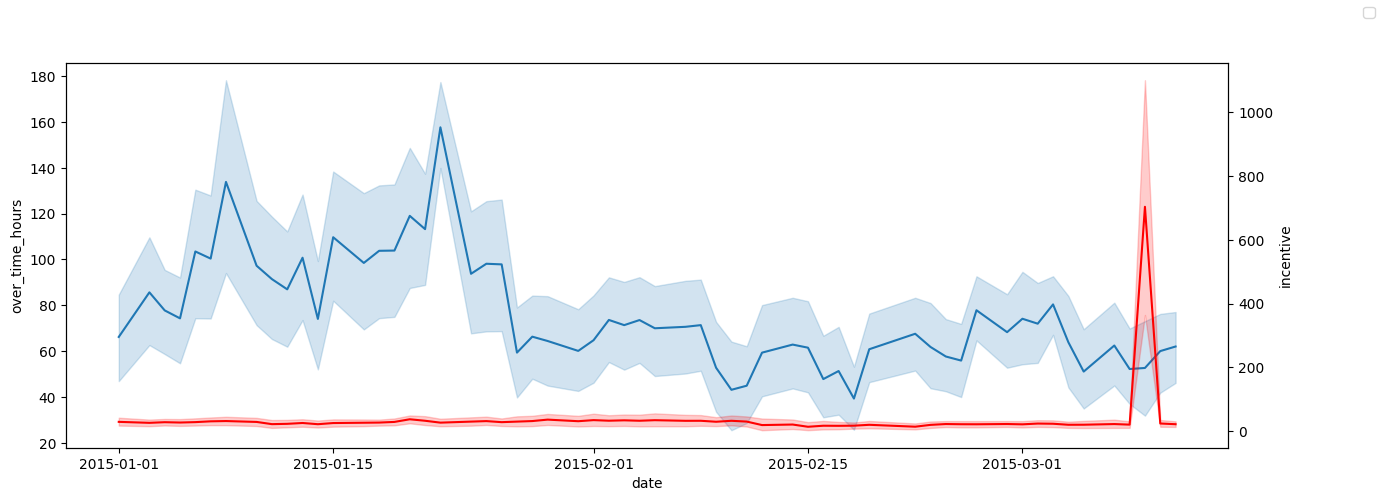

In [12]:
#The spike of incentives does not seem to exactly correlate with overtime, however it can also mean that the incentives get paid
#by quartal - we do not have the details to further assess that

plt.figure(figsize = (15,5))
ax=sns.lineplot(data =df, x="date", y="over_time_hours", legend="brief")
ax2 = ax.twinx()
ax=sns.lineplot(data =df,x="date", y="incentive", ax=ax2, legend="brief", color="r")
ax.figure.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


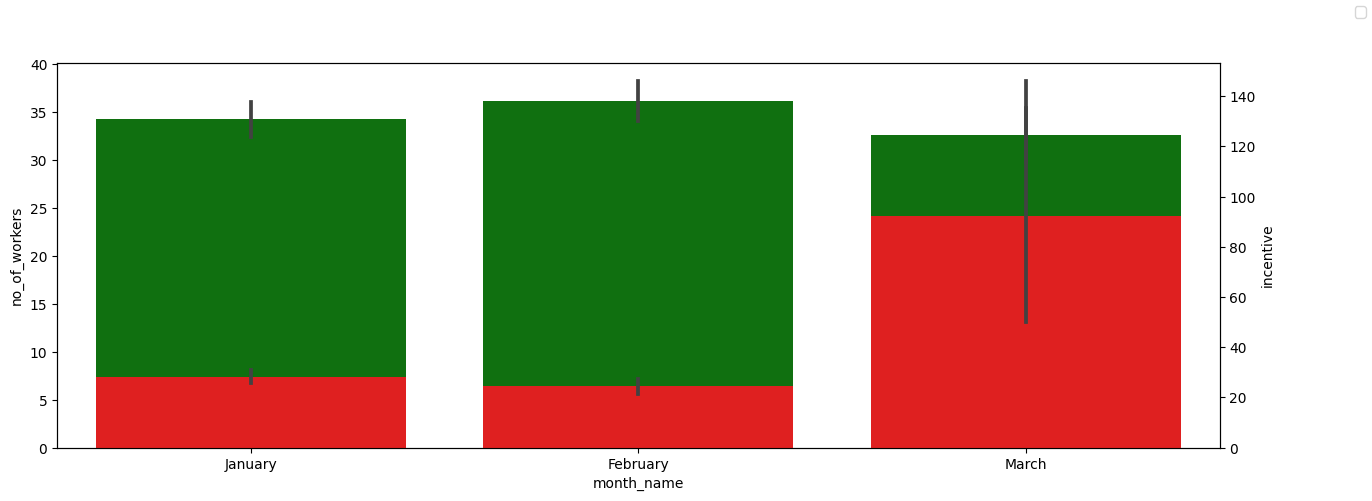

In [13]:
#Even between the number of workers and the incentive count is no correlation - just to be sure ;)
plt.figure(figsize = (15,5))
ax=sns.barplot(data =df, x="month_name", y="no_of_workers", color = "g")
ax2 = ax.twinx()
ax=sns.barplot(data =df,x="month_name", y="incentive", ax=ax2, color="r")
ax.figure.legend()
plt.show()


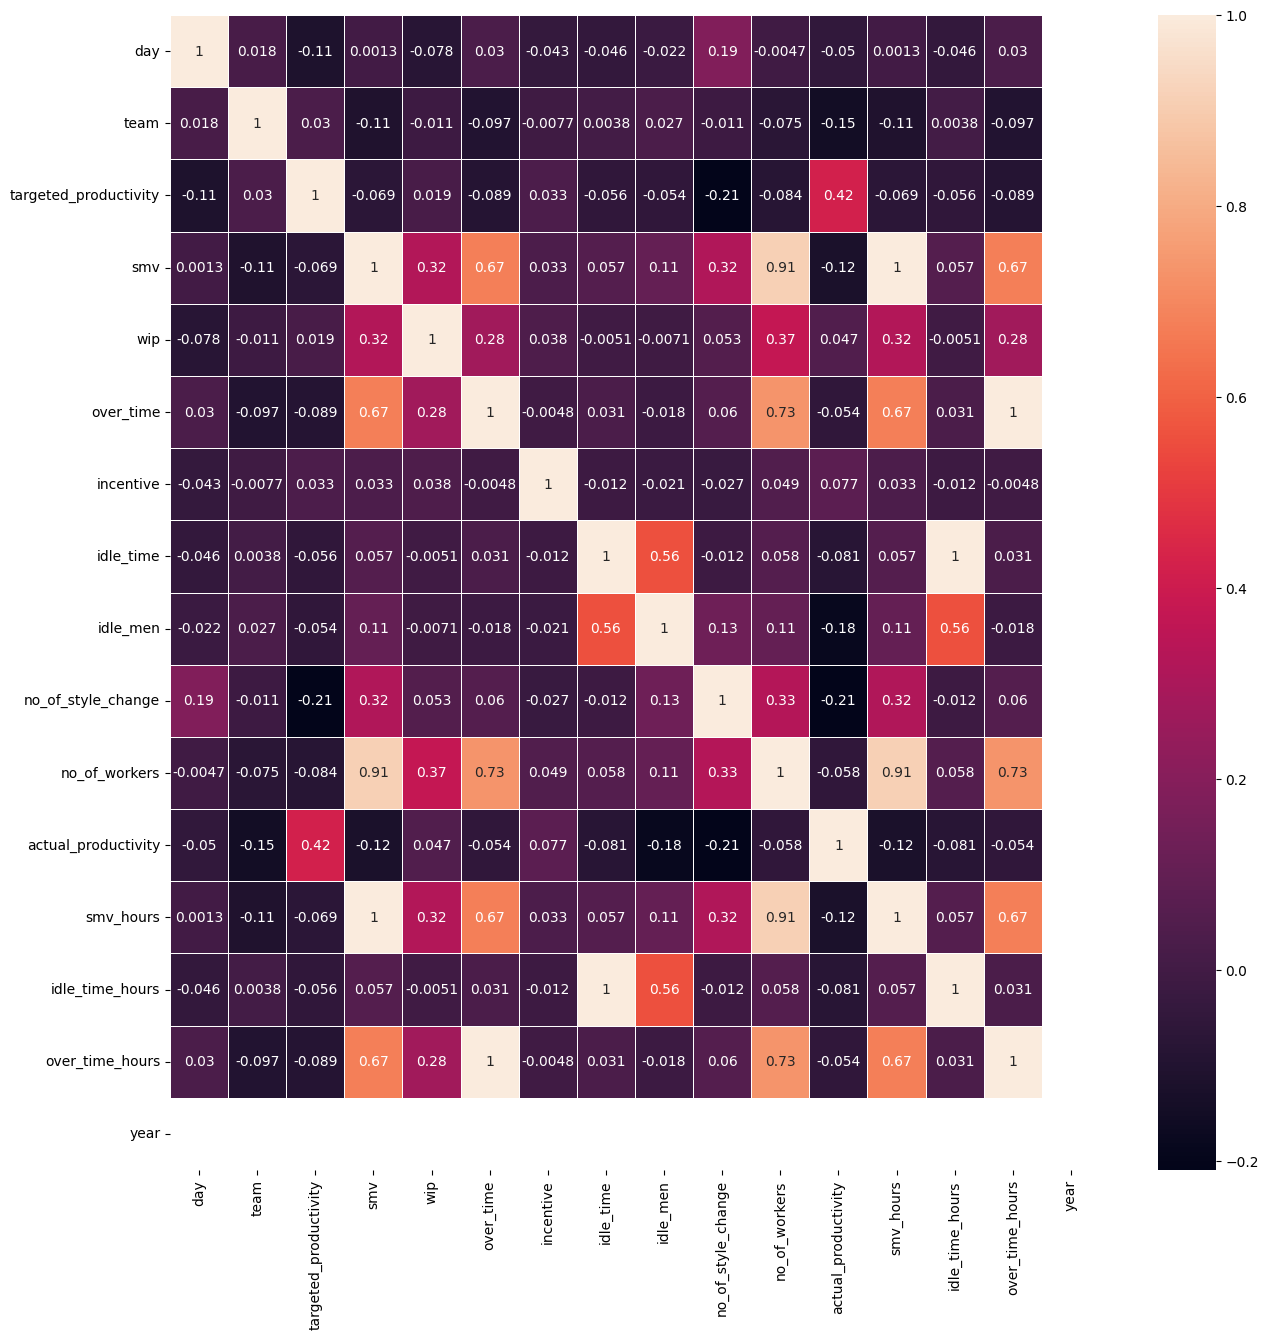

In [14]:
#Now that we played around a bit a looked at the most important graphs that came into our mind, we can look at a correlation matrix
#to see where exactly there is a correlation between actual_productvity and other variables. With that we can then begin to create our
#prediction model

corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(15,15)) # Sample figsize in inches
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

#Seems like the only 2 values with a strong correlation to actual_productivity are targeted_productvity, idle_men and no_of_style_change
#we will caulculate the correlation coefficient and p-value between these values to determine which ones to consider


In [2]:
from scipy.stats.stats import pearsonr

#idle_men and no_of_style_change

print(pearsonr(df["actual_productivity"], df["targeted_productivity"]))
#PearsonRResult(statistic=0.4215938837001504, pvalue=8.99789915317529e-53)
print(pearsonr(df["actual_productivity"], df["idle_men"]))
#PearsonRResult(statistic=-0.1817343264334765, pvalue=2.3914534213767993e-10)
print(pearsonr(df["actual_productivity"], df["targeted_productivity"]))
#PearsonRResult(statistic=0.4215938837001504, pvalue=8.99789915317529e-53)
print(pearsonr(df["actual_productivity"], df["smv"]))

#Seems like all of them are significant relevant for our model

/tmp/ipykernel_121/536109576.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


NameError: name 'df' is not defined

# Modeling

## Linear Regression

In [15]:

df.drop(['date'],axis=1, inplace=True)
df.isnull().sum() / len(df) * 100  
df.drop(['wip'],axis=1, inplace=True)

In [16]:
#and make each column a numerical one for the moment

import MultiColumnLabelEncoder
Mcle = MultiColumnLabelEncoder.MultiColumnLabelEncoder()
df = Mcle.fit_transform(df)

x=df.drop(['actual_productivity'],axis=1)
y=df['actual_productivity']


In [17]:
#split train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8,random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [19]:
model_lr=LinearRegression()

In [20]:
model_lr.fit(x_train,y_train)

LinearRegression()

In [21]:
pred_test=model_lr.predict(x_test) #the prediction (if we run it e.g. for next years data, it will predict for that)

In [22]:
pred_test

array([0.72460668, 0.88283034, 0.78384306, 0.74809   , 0.6725395 ,
       0.68162571, 0.71733214, 0.70022967, 0.78862109, 0.66708968,
       0.74523519, 0.69854245, 0.54558328, 0.71532157, 0.49034796,
       0.78621497, 0.6994874 , 0.68637528, 0.59868885, 0.71716443,
       0.73587957, 0.72143116, 0.64234654, 0.74110857, 0.62268844,
       0.81123331, 0.73406424, 0.8060267 , 0.83346945, 0.680642  ,
       0.753723  , 0.79014044, 0.75522012, 0.81122748, 0.79925375,
       0.80752559, 0.81986738, 0.679322  , 0.85112428, 0.7768197 ,
       0.56260959, 0.78159972, 0.78995235, 0.76682865, 0.70804556,
       0.74539178, 0.77789689, 0.77842153, 0.84916871, 0.60969185,
       0.82423444, 0.85874117, 0.80173469, 0.64012038, 0.77380822,
       0.72690789, 0.86809   , 0.83591186, 0.85864304, 0.59341996,
       0.81020214, 0.76256428, 0.773537  , 0.82303113, 0.73167053,
       0.77027875, 0.72020733, 0.6987207 , 0.73430859, 0.70579738,
       0.58812253, 0.70386866, 0.71474239, 0.6692492 , 0.44540

In [24]:
y_test

700     0.800402
621     0.999924
319     0.964106
837     0.640250
761     0.600448
          ...   
686     0.700618
906     0.800137
866     0.830063
1128    0.960625
953     0.700252
Name: actual_productivity, Length: 240, dtype: float64

In [25]:
print("test_MSE:",mean_squared_error(y_test, pred_test))
print("test_MAE:",mean_absolute_error(y_test, pred_test))
print("R2_score:{}".format(r2_score(y_test, pred_test)))

test_MSE: 0.02096140417204811
test_MAE: 0.10637937075162211
R2_score:0.29102653273241197


In [26]:
print(f"coefficients: {model_lr.coef_}") #this model takes all attributes
#for me it was not very clear which coefficients were which attributes, 
#hence the next output

coefficients: [-1.55737728e-03  3.69002766e-02 -5.12669850e-04 -8.43115879e-03
  6.82493726e-01 -7.51054381e-03 -6.19608218e-06  5.71247031e-05
  9.90276106e-04 -9.22246675e-03 -3.11860502e-02  4.85170857e-03
 -1.25175730e-04  1.65046018e-05 -1.03268032e-07  0.00000000e+00
 -2.33373084e-02]


In [27]:
import statsmodels.api as sm

model_lrr =sm.OLS(y_train,x_train)

classifier = model_lrr.fit()

y_pred = classifier.predict(x_test)

print(classifier.summary2())

                   Results: Ordinary least squares
Model:              OLS                 Adj. R-squared:     0.270    
Dependent Variable: actual_productivity AIC:                -906.8990
Date:               2022-12-04 08:15    BIC:                -838.8058
No. Observations:   957                 Log-Likelihood:     467.45   
Df Model:           13                  F-statistic:        28.24    
Df Residuals:       943                 Prob (F-statistic): 8.23e-59 
R-squared:          0.280               Scale:              0.022370 
---------------------------------------------------------------------
                       Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------
quarter               -0.0016   0.0178 -0.0877 0.9302 -0.0364  0.0333
department             0.0369   0.0295  1.2503 0.2115 -0.0210  0.0948
day                   -0.0005   0.0026 -0.1992 0.8422 -0.0056  0.0045
team                  -0.0084   0.0015 

### Random Forst addition

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rfe = RandomForestRegressor(n_estimators=200,max_depth=5)
model_rfe.fit(x_train, y_train)
pred = model_rfe.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred))
print("test_MAE:",mean_absolute_error(y_test, pred))
print("R2_score:{}".format(r2_score(y_test, pred)))

test_MSE: 0.015341305617774326
test_MAE: 0.08516486406041016
R2_score:0.48111402523553104


In [ ]:
print(pred[4], y_test)

0.5974745832713929 700     0.800402
621     0.999924
319     0.964106
837     0.640250
761     0.600448
          ...   
686     0.700618
906     0.800137
866     0.830063
1128    0.960625
953     0.700252
Name: actual_productivity, Length: 240, dtype: float64


### XGBoost

In [29]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=5,learning_rate=0.1)
model_xgb.fit(x_train, y_train)
pred3=model_xgb.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred3))
print("test_MAE:",mean_absolute_error(y_test, pred3))
print("R2_score:{}".format(r2_score(y_test, pred3)))

test_MSE: 0.01552309819475532
test_MAE: 0.08069026638669523
R2_score:0.474965290514906


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

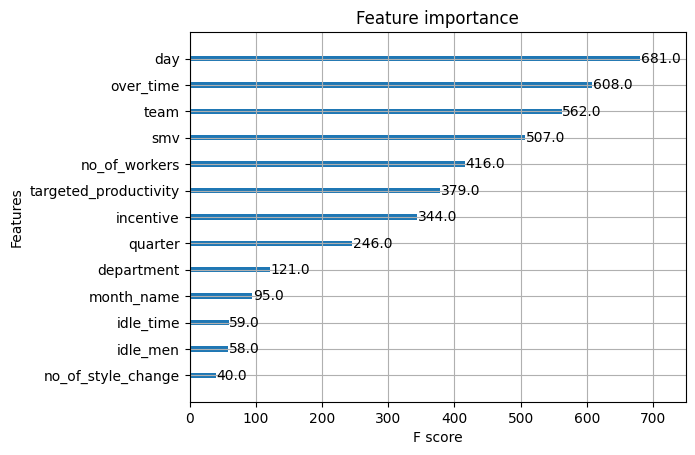

In [42]:
pred3

xgb.plot_importance(model_xgb)

## Multiple linear regression

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder,PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
data=df.copy()

In [ ]:
le = LabelEncoder()
data['department'] = le.fit_transform(data['department'])


X=data[['targeted_productivity', 'team','smv','idle_men', 'no_of_style_change']]
y=data['actual_productivity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


s = StandardScaler()
X_train_sm = s.fit_transform(X_train)

mlr = LinearRegression()
mlr.fit(X_train_sm, y_train)
X_test_sm = s.transform(X_test)
y_pred_sm = mlr.predict(X_test_sm)

In [ ]:
#Accuracy and MSE
print(f'R2 score is {r2_score(y_pred_sm,y_test)}')
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred_sm - y_test) ** 2))

R2 score is -2.4045474314511472
Residual sum of squares (MSE): 0.02


In [ ]:
print(f'Co-efficients are {mlr.coef_}')
print(f'Intercept is {mlr.intercept_}')

Co-efficients are [ 0.0705507  -0.03090288 -0.01399105 -0.02763367 -0.01446043]
Intercept is 0.7342287210525688


## Feature selection and Random Forest

In [32]:


from sklearn.metrics import accuracy_score, confusion_matrix,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder,PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [33]:
category = df.select_dtypes(include='object')
numerical = df.select_dtypes(exclude='object')

for c in category.columns:
    print(f"{c}")
    print(category[c].unique())
    print()

category.loc[:,'department'] = category.loc[:,'department'].str.strip()

KeyError: 'department'

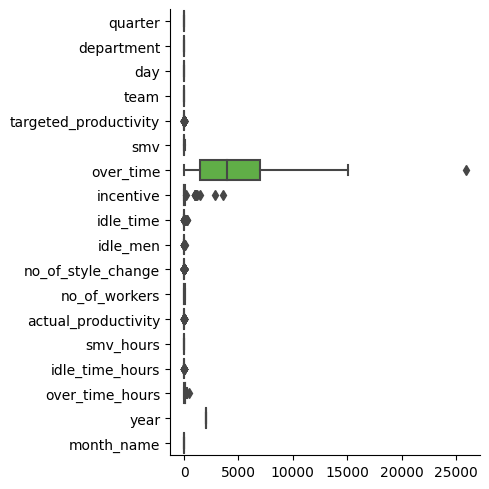

In [34]:
numerical.describe()
sns.catplot(kind='box', data=numerical, orient='h');


In [35]:
df2 = pd.concat([category, numerical], axis=1)
df2


,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,smv_hours,idle_time_hours,over_time_hours,year,month_name
0,0,0,1,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,0.436000,0.0,118.0,2015,0
1,0,1,1,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,0.065667,0.0,16.0,2015,0
2,0,0,1,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,0.190167,0.0,61.0,2015,0
3,0,0,1,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,0.190167,0.0,61.0,2015,0
4,0,0,1,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,0.431667,0.0,32.0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,1,11,10,0.75,2.90,960,0,0.0,0,0,8.0,0.628333,0.048333,0.0,16.0,2015,2
1193,1,1,11,8,0.70,3.90,960,0,0.0,0,0,8.0,0.625625,0.065000,0.0,16.0,2015,2
1194,1,1,11,7,0.65,3.90,960,0,0.0,0,0,8.0,0.625625,0.065000,0.0,16.0,2015,2
1195,1,1,11,9,0.75,2.90,1800,0,0.0,0,0,15.0,0.505889,0.048333,0.0,30.0,2015,2


In [36]:
df2[df2.isnull().any(axis=1)]['department'].unique()

array([], dtype=int64)

In [38]:
df2['wip'] = df2['wip'].fillna(value=0.0)

KeyError: 'wip'

In [39]:
df2.drop(['date'],axis=1,inplace=True)

df2_dummies = pd.get_dummies(df2, drop_first=True)

KeyError: "['date'] not found in axis"

In [40]:
features = df2_dummies.drop(['actual_productivity'], axis=1).columns

NameError: name 'df2_dummies' is not defined

### 1) Sequential Feature Selector

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor

X, y = df2_dummies.drop(['actual_productivity'], axis=1), df2_dummies['actual_productivity']
rf = RandomForestRegressor()

In [ ]:
sfs = SequentialFeatureSelector(rf, n_features_to_select=7, direction='forward')
sfs.fit(X, y)

SequentialFeatureSelector(estimator=RandomForestRegressor(),
                          n_features_to_select=7)

In [ ]:
features[sfs.get_support()]

Index(['targeted_productivity', 'smv', 'incentive', 'no_of_workers',
       'idle_time_hours', 'quarter_Quarter4', 'month_name_January'],
      dtype='object')

In [ ]:
# Transform to use only selected features
X_selected = sfs.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=112)

model = RandomForestRegressor().fit(X_train, y_train)

# This is the result
y_pred = model.predict(X_test)
print(f'mse = {mse(y_true=y_test, y_pred=y_pred)}')

mse = 0.01575154536725225


In [31]:
# Compared to the distribution of target,
# the result of model built with only 7 features
# is fairly good.
df2['actual_productivity'].hist();

NameError: name 'df2' is not defined

In [ ]:
y_pred

array([0.69369172, 0.70805566, 0.70978794, 0.41614286, 0.67878414,
       0.83807739, 0.56202189, 0.80022201, 0.77438329, 0.82522788,
       0.75018144, 0.85059353, 0.99972954, 0.83446879, 0.96599936,
       0.5033163 , 0.38349131, 0.50162702, 0.57570139, 0.73497627,
       0.80327661, 0.72625447, 0.80022201, 0.44771994, 0.7588865 ,
       0.4850284 , 0.59919905, 0.80003308, 0.86371756, 0.51908866,
       0.46835174, 0.79353084, 0.8974623 , 0.78670506, 0.75045234,
       0.99493096, 0.86471451, 0.70364437, 0.67878414, 0.45543095,
       0.79649471, 0.67878414, 0.79964616, 0.79850984, 0.43393358,
       0.72805725, 0.80014667, 0.85059353, 0.67741515, 0.80026447,
       0.80155652, 1.00067862, 0.90062314, 0.79309645, 0.82522788,
       0.43824146, 0.8325653 , 0.92257343, 0.70041473, 0.8873157 ,
       0.61597957, 0.61423017, 0.75258333, 0.80029045, 0.69530276,
       0.36799402, 0.80022201, 0.59701838, 0.84133327, 0.80034509,
       0.80022201, 0.61837389, 0.4535102 , 0.6291774 , 0.76756

### 2) Recursive feature elimination¶

In [ ]:
from sklearn.feature_selection import RFE

X, y = df2_dummies.drop(['actual_productivity'], axis=1), df2_dummies['actual_productivity']

estimator = RandomForestRegressor()
rfe = RFE(estimator, n_features_to_select=7, step=1)
rfe.fit(X, y)

RFE(estimator=RandomForestRegressor(), n_features_to_select=7)

In [ ]:
# Transform to use only selected features
features[rfe.support_]

Index(['day', 'team', 'targeted_productivity', 'smv', 'over_time', 'incentive',
       'no_of_workers'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(rfe.transform(X), y, test_size=0.2, random_state=112)

model = RandomForestRegressor().fit(X_train, y_train)

# This is the result
y_pred = model.predict(X_test)
print(f'mse = {mse(y_true=y_test, y_pred=y_pred)}')


NameError: name 'train_test_split' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6cfd52dc-a542-4ebd-bf48-5f64d542324f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>